# Customer Churn Analysis
***

##### Batch - DS0422

##### Submitted by - Akash Shrivastava
***

## Problem Statement:

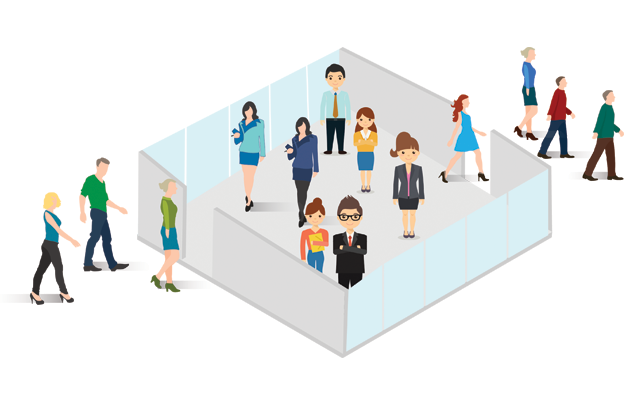

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Note: You can find the dataset in the link below.

**Downlaod Files:**
*https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv*
***

In [1]:
# Importing required libraries
import numpy as np  #---- for computation
import pandas as pd #---- for dataframe dependencies

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# for stats
from scipy import stats

# filtering warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
df=pd.read_csv('Telecom_customer_churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
print('No. Of Rows -',df.shape[0])
print('No. Of Columns -',df.shape[1])

No. Of Rows - 7043
No. Of Columns - 21


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Checking Datatype

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Comment - 

- There are 7043 rows and 21 columns in telecom Dataset.
- "Churn"i.e target variable is object datatype,which leads this dataset under classification problem.
- We have 3 Numerical variables and 18 categorical variables.
- There is an interesting insight 'TotalCharges' is under object datatype but this feature is numerical in nature but it is catergorized as object datatype.This implies that there is presence of string variable in this column or there might be a data error.
- 'SeniorCitizen' is categorical variable listed as Numerical Variable,So we are going to convert it into object datatype.
- 'CistomerID' is unnecessary variable from our analytical & modeling viewpoint.So we will drop 'CustomerId' colummn.

In [9]:
df.drop(['customerID'],axis=1,inplace=True)

In [10]:
df['SeniorCitizen']=df['SeniorCitizen'].astype(object)

In [11]:
#splitting into numerical & categorical 
Categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
Numerical =['tenure', 'MonthlyCharges', 'TotalCharges']

## Data Integrity Check

In [12]:
df.duplicated().sum()    #checks duplicate entries in dataset

22

##### Comment - We can observe that there are 22 duplicate entries in dataset. Let's drop duplicated entries from dataset.

In [13]:
df.drop_duplicates(keep='last',inplace=True)

In [14]:
df.shape

(7021, 20)

##### Let's now check for any whitespaces , NA,'-' in dataset .Also we might find something in 'TotalCharges' column by considering object datatype.

In [15]:
df.isin([' ','NA','-']).sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##### Comment - From above observation there is possibility of whitespaces in TotalCharges column.Now let's deal with it

In [16]:
df['TotalCharges'].isin([' ']).sum().any()

True

In [17]:
#Replacing whitespaces with Null values
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)

In [18]:
#converting object datatype into float
df['TotalCharges']=df['TotalCharges'].astype(float)

### Checking Missing Values

In [19]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
TotalCharges                  11        0.156673
gender                         0        0.000000
SeniorCitizen                  0        0.000000
MonthlyCharges                 0        0.000000
PaymentMethod                  0        0.000000
PaperlessBilling               0        0.000000
Contract                       0        0.000000
StreamingMovies                0        0.000000
StreamingTV                    0        0.000000
TechSupport                    0        0.000000
DeviceProtection               0        0.000000
OnlineBackup                   0        0.000000
OnlineSecurity                 0        0.000000
InternetService                0        0.000000
MultipleLines                  0        0.000000
PhoneService                   0        0.000000
tenure                         0        0.000000
Dependents                     0        0.000000
Partner                        0        0.000000
Churn               

##### Comment - There are missing value in TotalCharges column . We can impute missing values in TotalCharges either with mean and median.We can decide imputation method after checking outliers in data.

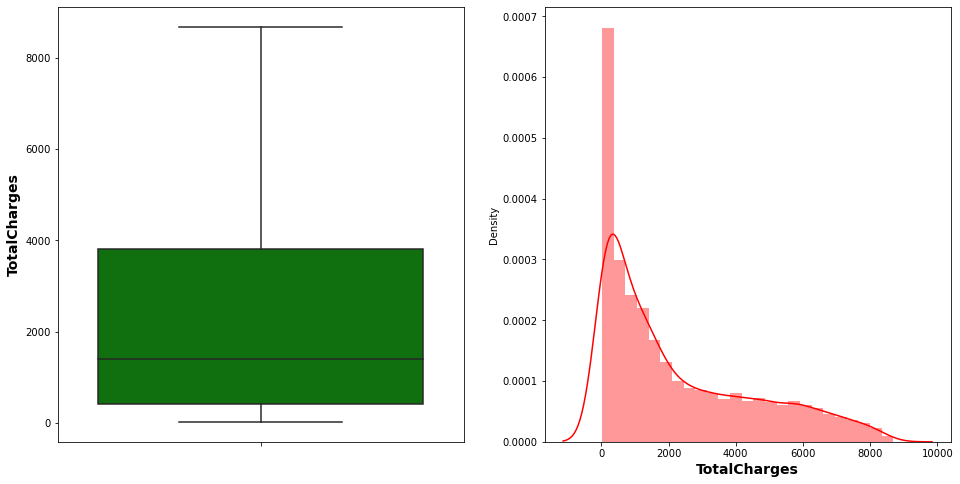

In [20]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(y='TotalCharges',data=df,color='g')
plt.ylabel('TotalCharges',fontsize=14,fontweight='bold')
plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'],color='r')
plt.xlabel('TotalCharges',fontsize=14,fontweight='bold')
plt.tight_layout
plt.show()

In [21]:
print('Mean of TotalCharges -',df['TotalCharges'].mean())
print('Median of TotalCharges -',df['TotalCharges'].median())

Mean of TotalCharges - 2290.353388017122
Median of TotalCharges - 1403.875


##### Comment - 

- Mean is greater than median.
- Distribution plot shows that TotalCharges feature is right skewed.
- We can observe that outliers does'nt exists , so no mean sensitivity issue present here.

**From above observations we can impute missing value with mean** 

### Imputation of Missing Values in TotalCharges with Mean

In [22]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

## Checking Null Values After Imputation

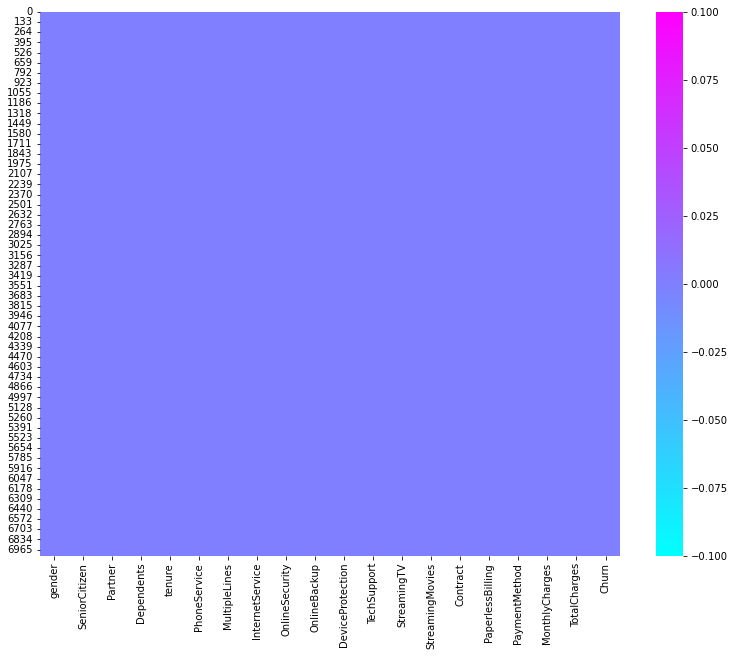

In [23]:
plt.figure(figsize=(13,10))
sns.heatmap(df.isnull(),cmap='cool')
plt.show()

##### Comment - Finally !!! , There is no missingg value present.

## Statistical Analysis

In [24]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'],cmap='summer_r')

,count,mean,std,min,25%,50%,75%,max
tenure,7021.000000,32.469449,24.534965,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7021.000000,64.851894,30.069001,18.250000,35.750000,70.400000,89.900000,118.750000
TotalCharges,7021.000000,2290.353388,2265.044136,18.800000,411.150000,1410.250000,3801.700000,8684.800000


In [25]:
df[Categorical].describe().T

,count,unique,top,freq
gender,7021,2,Male,3541
SeniorCitizen,7021,2,0,5880
Partner,7021,2,No,3619
Dependents,7021,2,No,4911
PhoneService,7021,2,Yes,6339
MultipleLines,7021,3,No,3368
InternetService,7021,3,Fiber optic,3090
OnlineSecurity,7021,3,No,3490
OnlineBackup,7021,3,No,3080
DeviceProtection,7021,3,No,3087


##### Comment - To avoid customer churn the best way is to know your customer ,there needs and provide them best customer service and to do so the best way to know your customer is through historical and new customer data.

### Enlisting Value counts & sub-categories of different categorical features

In [26]:
for i in Categorical:
    print(i)
    print(df[i].value_counts())
    print('='*100)

gender
Male      3541
Female    3480
Name: gender, dtype: int64
SeniorCitizen
0    5880
1    1141
Name: SeniorCitizen, dtype: int64
Partner
No     3619
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4911
Yes    2110
Name: Dependents, dtype: int64
PhoneService
Yes    6339
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64
TechSupport
No                     

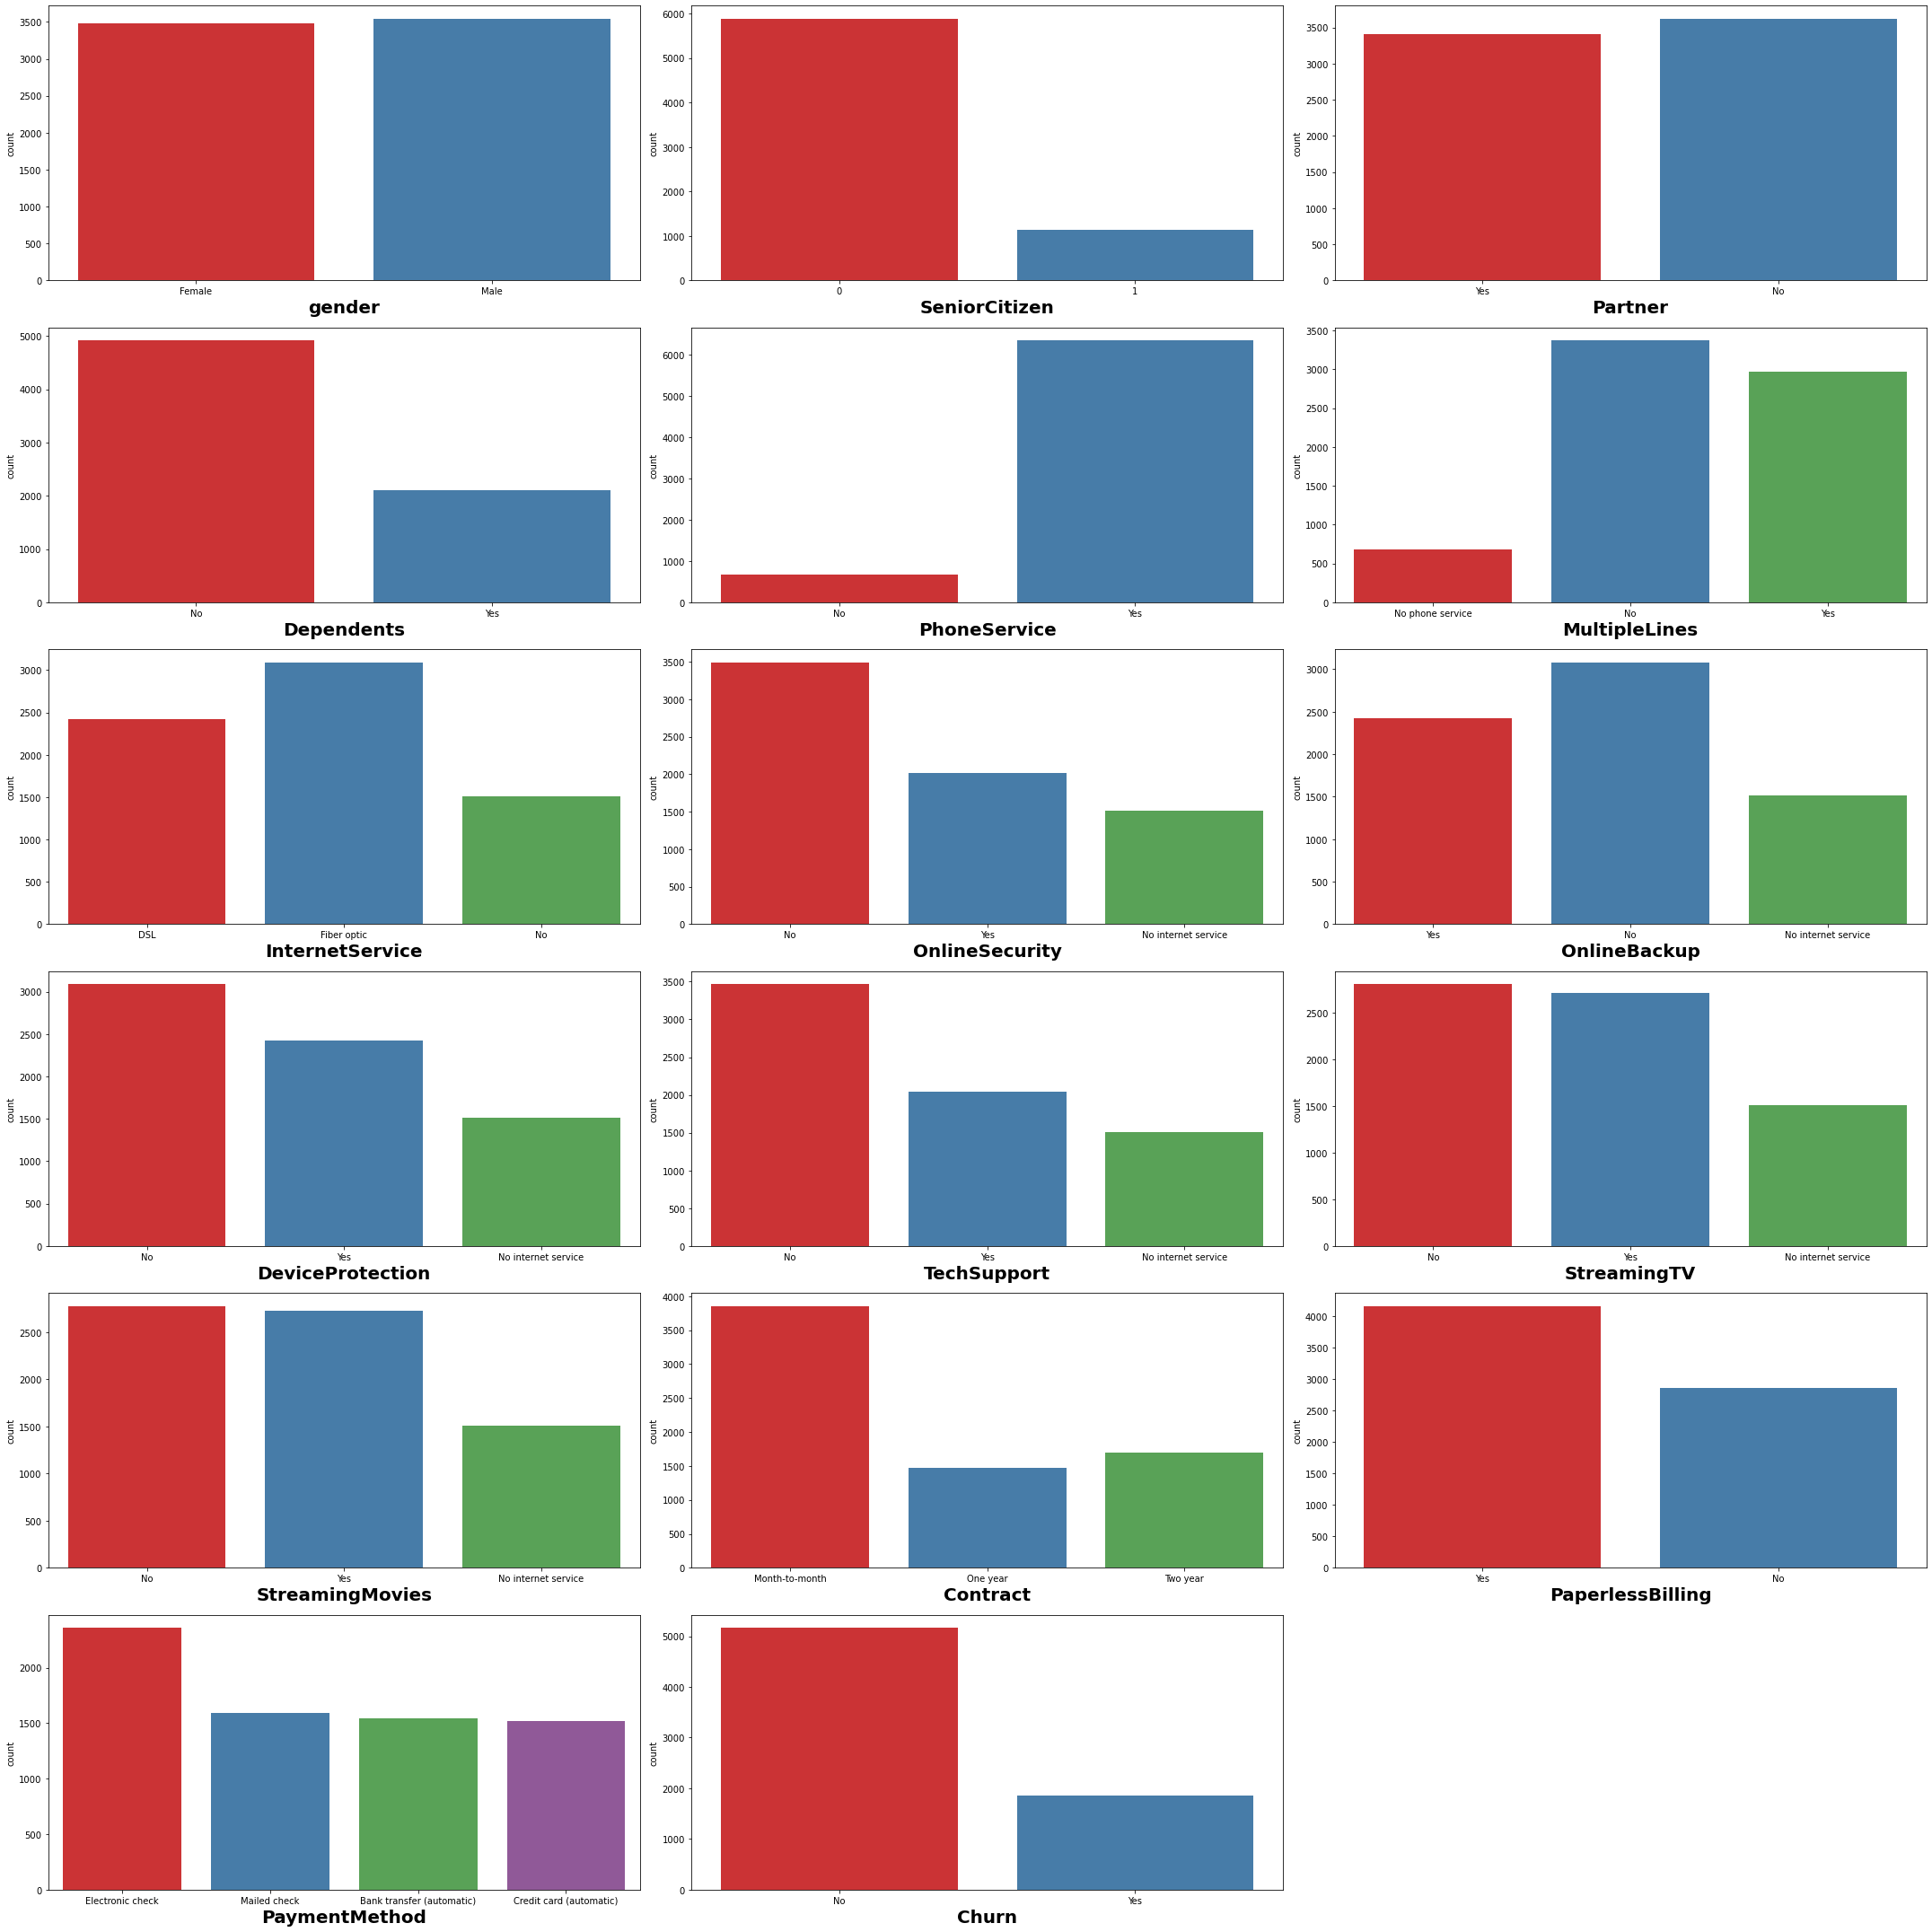

In [31]:
sns.set_palette('Set1')
plt.figure(figsize=(30,30), facecolor='white')
plotnumber =1
for i in Categorical :
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20,fontweight='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

## Exploring Features

### Analyzing Target variable

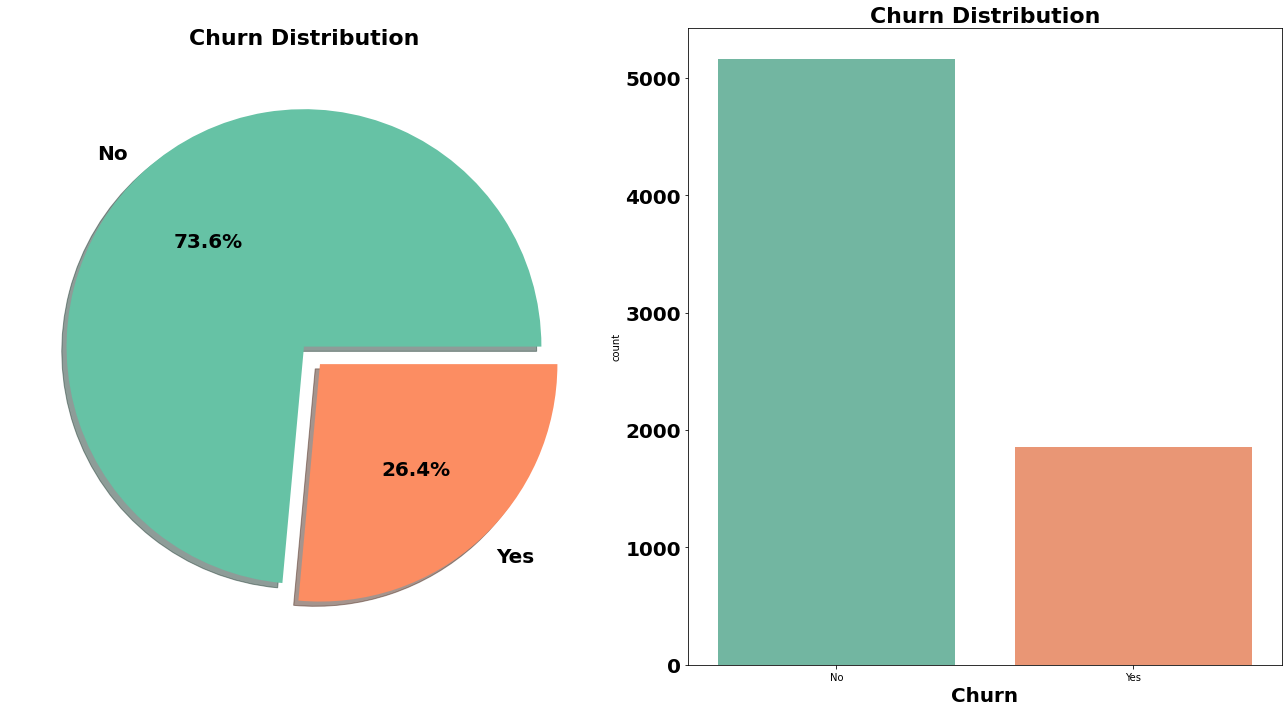

In [32]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('Set2')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',textprops={'fontsize':20,'fontweight':'bold'},ax=ax[0],shadow=True)
ax[0].set_title('Churn Distribution',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Churn',data=df,ax=ax[1])
ax[1].set_title('Churn Distribution',fontsize=22,fontweight='bold')
ax[1].set_xlabel('Churn',fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.show()

##### Comment - 26.4% ccustomer choose to churn services in last month which is quite high numbers.
**As churn is our target variable above observation leads to imbalanced data case.**

###### Let's start exploration of independent feature on the basis of where customer is unsatisfied and what are customer needs or inclination in cutting edge competition.

### Gender VS Churn

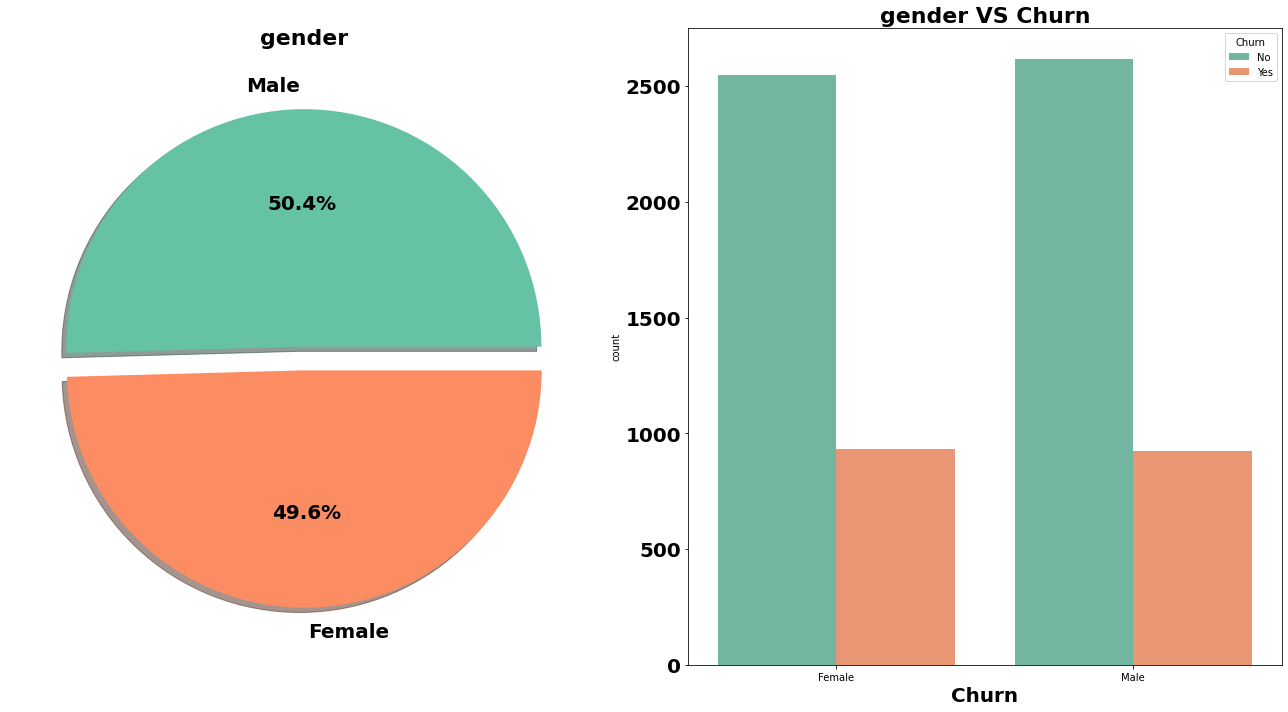

In [35]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('Set2')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',textprops={'fontsize':20,'fontweight':'bold'},ax=ax[0],shadow=True)
ax[0].set_title('gender',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('gender',hue='Churn',data=df,ax=ax[1])
ax[1].set_title('gender VS Churn',fontsize=22,fontweight='bold')
ax[1].set_xlabel('Churn',fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.show()

In [36]:
pd.crosstab(df['gender'],df['Churn'],margins=True).style.background_gradient(cmap='summer_r')

Churn,No,Yes,All
gender,,,
Female,2546,934,3480
Male,2618,923,3541
All,5164,1857,7021


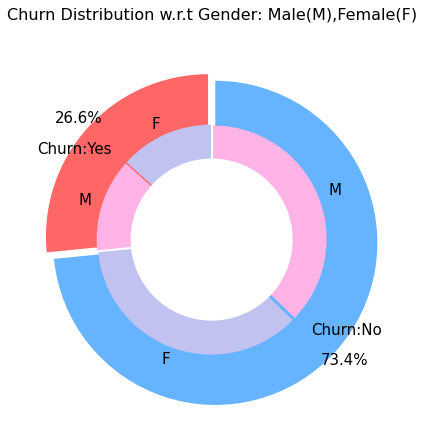

In [37]:
plt.figure(figsize=(6,6))
labels =['Churn:Yes','Churn:No']
values = [1869,5163]
labels_gender = ['F','M','F','M']
sizes_gender = [939,930,2544,2619]
colors= ['#ff6666','#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6','#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops={'fontsize':15}
#plot
plt.pie(values,labels=labels,autopct='%1.1f%%',pctdistance=1.08,labeldistance=0.8,colors=colors,startangle=90,frame=True,explode=explode,radius=10,textprops=textprops,counterclock=True)
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90,explode=explode_gender,radius=7,textprops=textprops,counterclock=True)
#Draw circle
centre_circle=plt.Circle((0,0),5,color='black',fc='white',linewidth=0)
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Churn Distribution w.r.t Gender: Male(M),Female(F)',fontsize=16,y=1.1)
#show plot
plt.axis('equal')
plt.tight_layout
plt.show()

##### Comment - 

- Both gender have tendency of attrition in same percentage.
- Data contain both gender almost in same proportion with minor difference.

### Senior Citizen VS  Churn

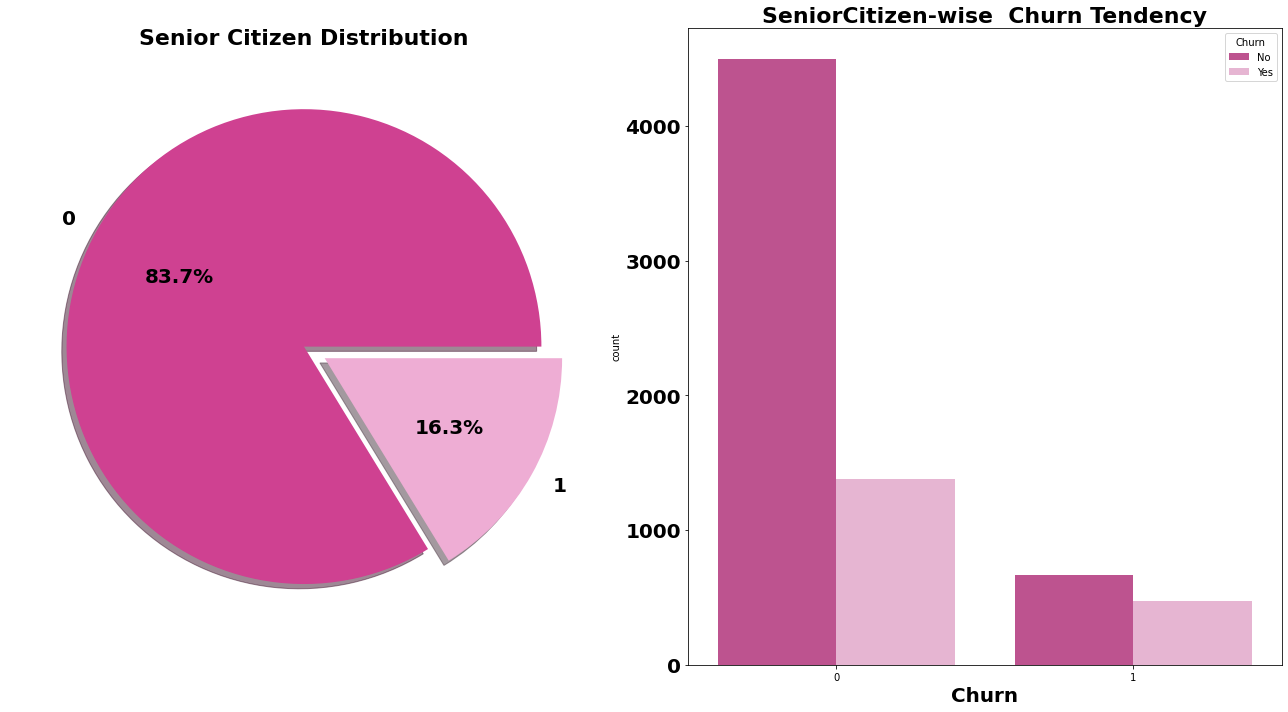

In [40]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('PiYG')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['SeniorCitizen'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',textprops={'fontsize':20,'fontweight':'bold'},ax=ax[0],shadow=True)
ax[0].set_title('Senior Citizen Distribution',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('SeniorCitizen',hue='Churn',data=df,ax=ax[1])
ax[1].set_title('SeniorCitizen-wise  Churn Tendency',fontsize=22,fontweight='bold')
ax[1].set_xlabel('Churn',fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.show()

##### Comment - There are only 16.3% of the customers who are senior citizens.Thus most of our customers in the dataset are younger people.

In [41]:
pd.crosstab([df['gender'],df['SeniorCitizen']],df['Churn'],margins=True).style.background_gradient(cmap='summer_r')

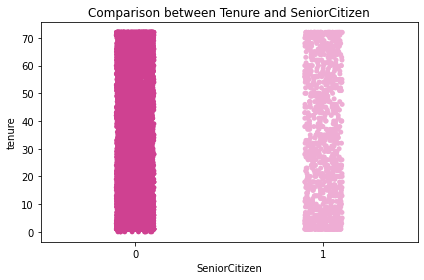

In [42]:
#comparing tenure and senior citizen
plt.title('Comparison between Tenure and SeniorCitizen')
sns.stripplot(x='SeniorCitizen',y='tenure',data=df)
plt.show()

###### Around 16% customer are senior citizen and from stripplot we can observe that they maximum tendency to churn.

*There is no significant relation between senior ccitizen and tenure.*

### Effects on Partners and Dependents on Churn

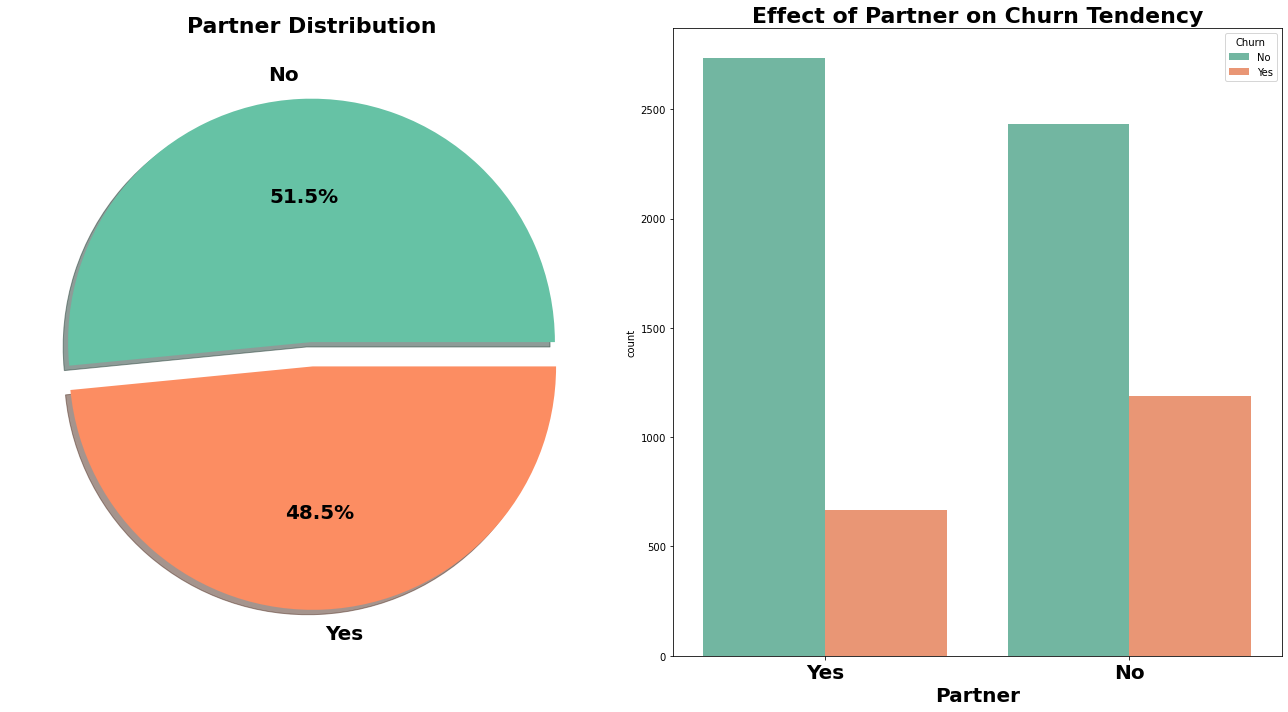

In [43]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('Set2')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['Partner'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',textprops={'fontsize':20,'fontweight':'bold'},ax=ax[0],shadow=True)
ax[0].set_title('Partner Distribution',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Partner',hue='Churn',data=df,ax=ax[1])
ax[1].set_title('Effect of Partner on Churn Tendency',fontsize=22,fontweight='bold')
ax[1].set_xlabel('Partner',fontsize=20,fontweight='bold')
plt.xticks(fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

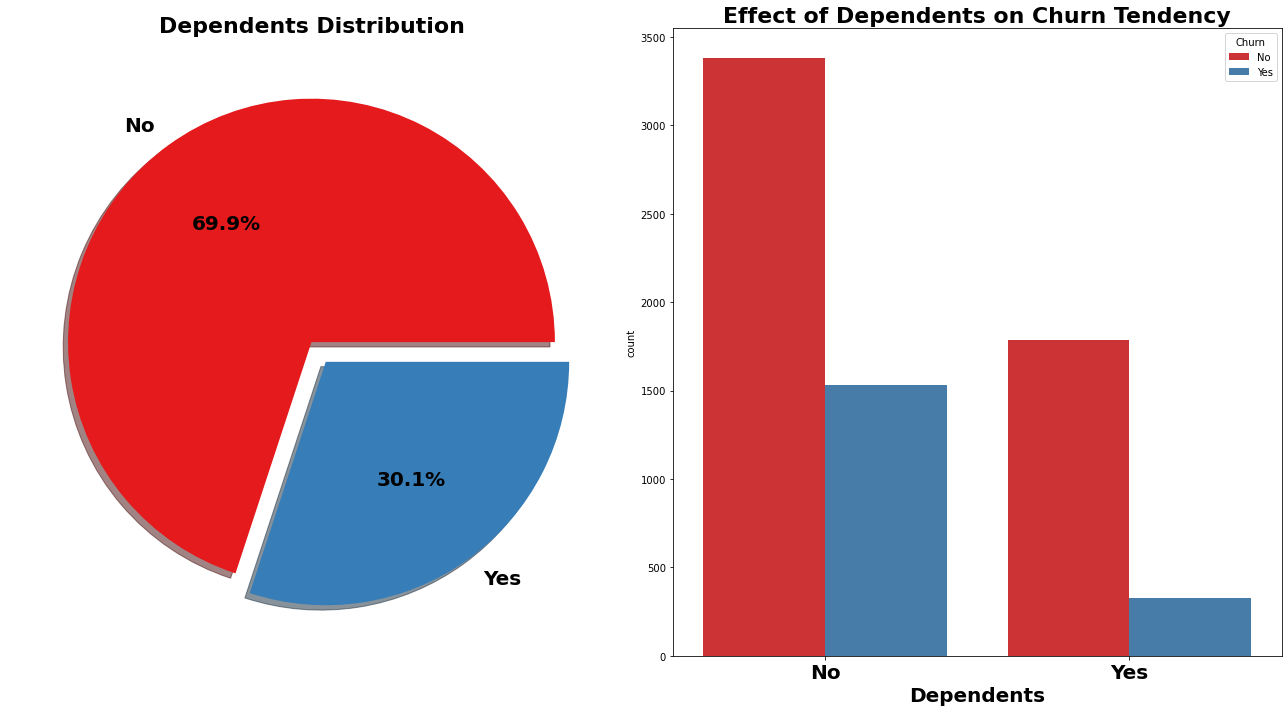

In [44]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',textprops={'fontsize':20,'fontweight':'bold'},ax=ax[0],shadow=True)
ax[0].set_title('Dependents Distribution',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue='Churn',data=df,ax=ax[1])
ax[1].set_title('Effect of Dependents on Churn Tendency',fontsize=22,fontweight='bold')
ax[1].set_xlabel('Dependents',fontsize=20,fontweight='bold')
plt.xticks(fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

##### Comment - 

- Customer having partner have less tendency to churn.
- Almost 30% Customer have dependents on them and they also have less tendency to churn compare to remaining 70%.

### StreamingTV VS Churn 

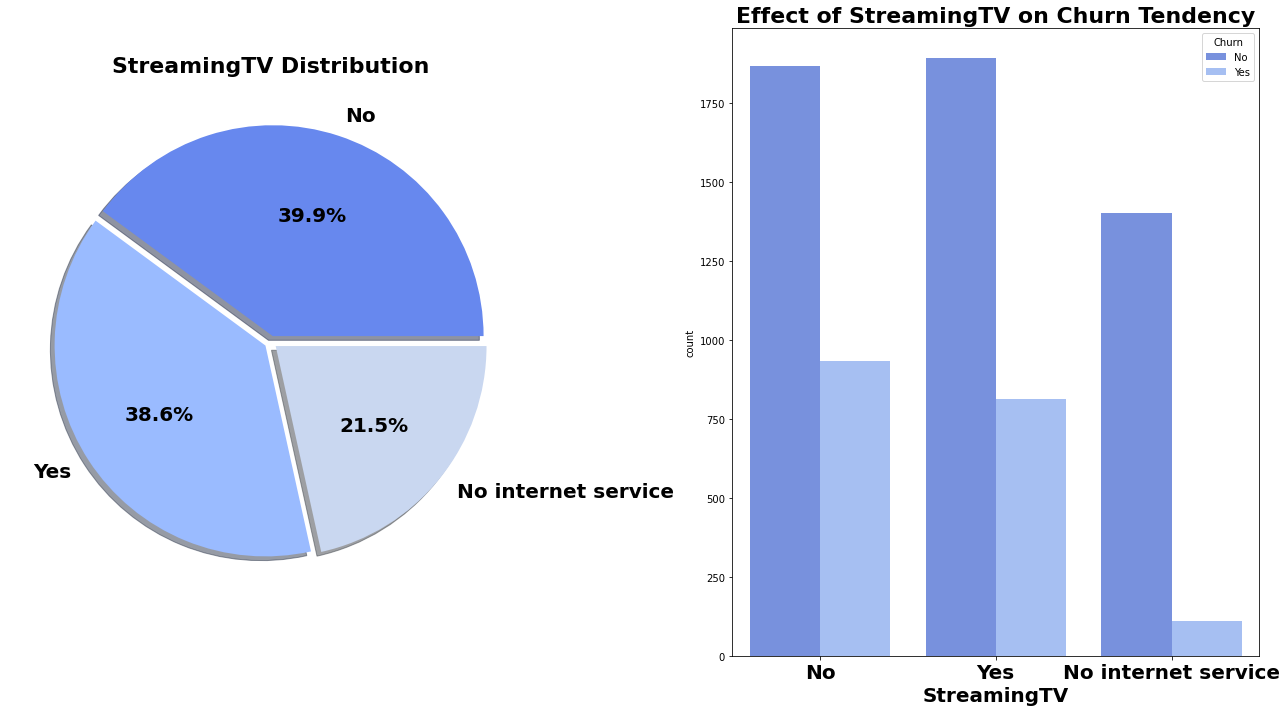

In [45]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['StreamingTV'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',textprops={'fontsize':20,'fontweight':'bold'},ax=ax[0],shadow=True)
ax[0].set_title('StreamingTV Distribution',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingTV',hue='Churn',data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingTV on Churn Tendency',fontsize=22,fontweight='bold')
ax[1].set_xlabel('StreamingTV',fontsize=20,fontweight='bold')
plt.xticks(fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

### InternetService VS Churn

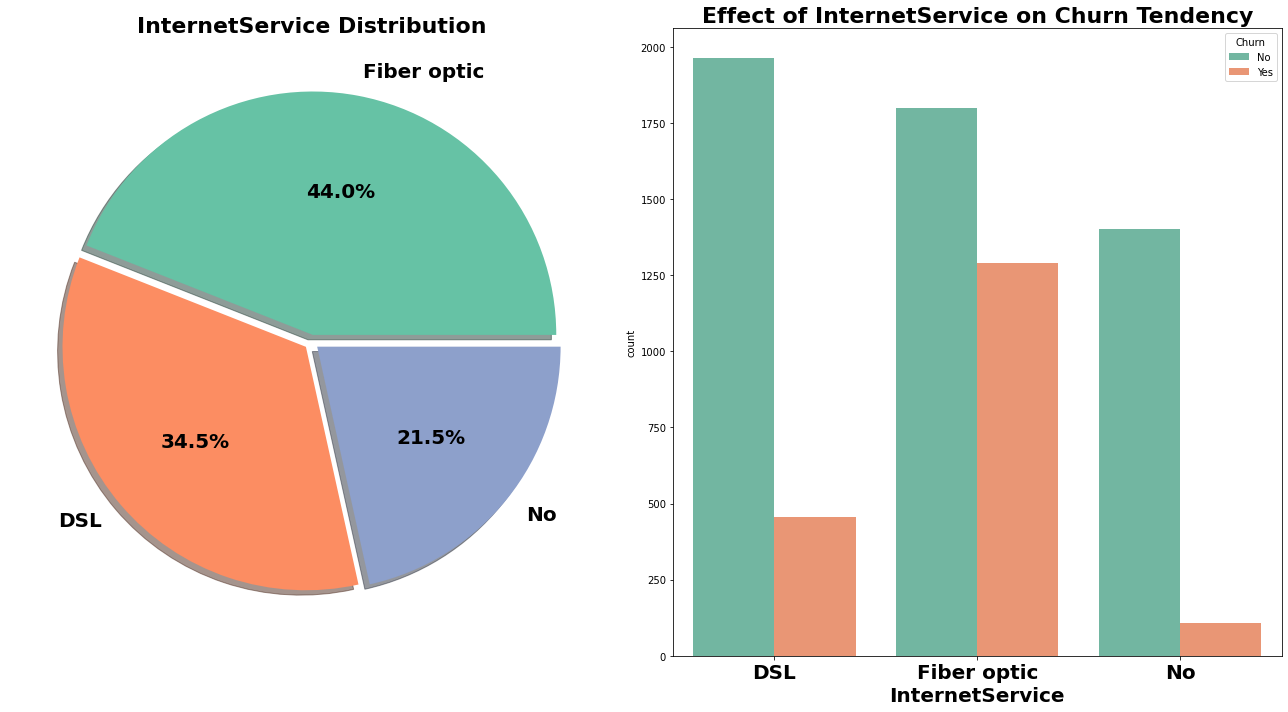

In [47]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('Set2')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['InternetService'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',textprops={'fontsize':20,'fontweight':'bold'},ax=ax[0],shadow=True)
ax[0].set_title('InternetService Distribution',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('InternetService',hue='Churn',data=df,ax=ax[1])
ax[1].set_title('Effect of InternetService on Churn Tendency',fontsize=22,fontweight='bold')
ax[1].set_xlabel('InternetService',fontsize=20,fontweight='bold')
plt.xticks(fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

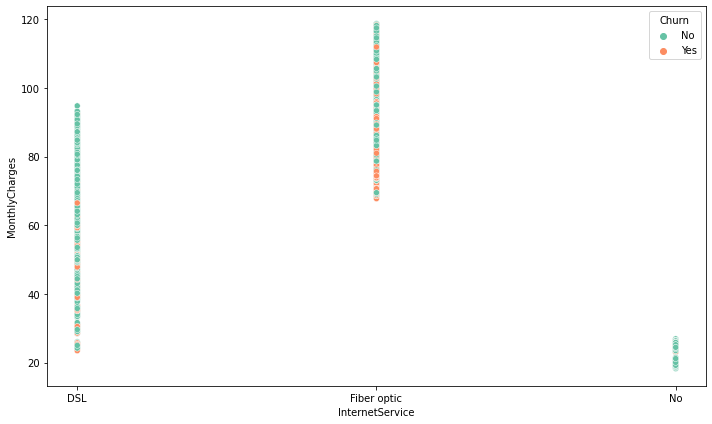

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='InternetService',y='MonthlyCharges',hue='Churn',data=df)
plt.show()

###### Comment - 44% customer prefer fibre optic as Internet service , suprisingly we can find highest churn rate amongst them.

**Fibre optic users compared to DSL pays high monthly charges . We Can conclue that High charges is the reason of customer churn.**

### StreamingMovies VS Churn

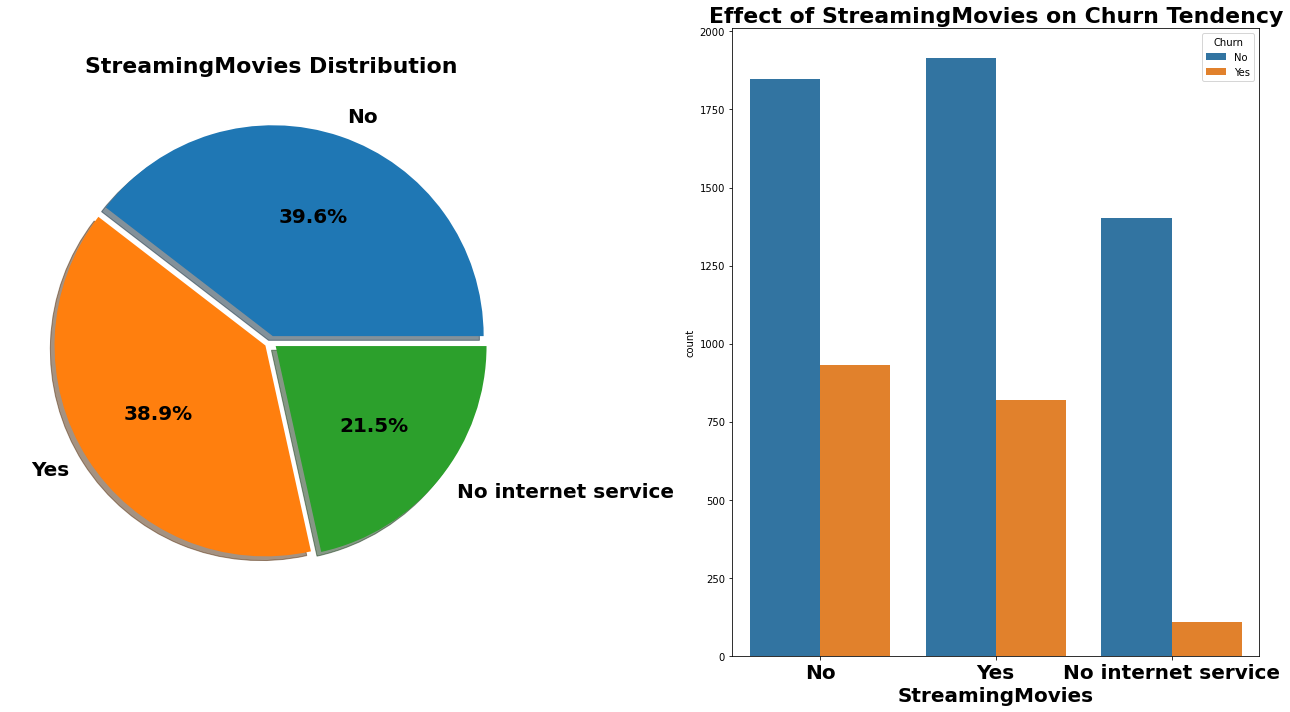

In [50]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('tab10')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['StreamingMovies'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',textprops={'fontsize':20,'fontweight':'bold'},ax=ax[0],shadow=True)
ax[0].set_title('StreamingMovies Distribution',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingMovies',hue='Churn',data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingMovies on Churn Tendency',fontsize=22,fontweight='bold')
ax[1].set_xlabel('StreamingMovies',fontsize=20,fontweight='bold')
plt.xticks(fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

### Contract VS Churn

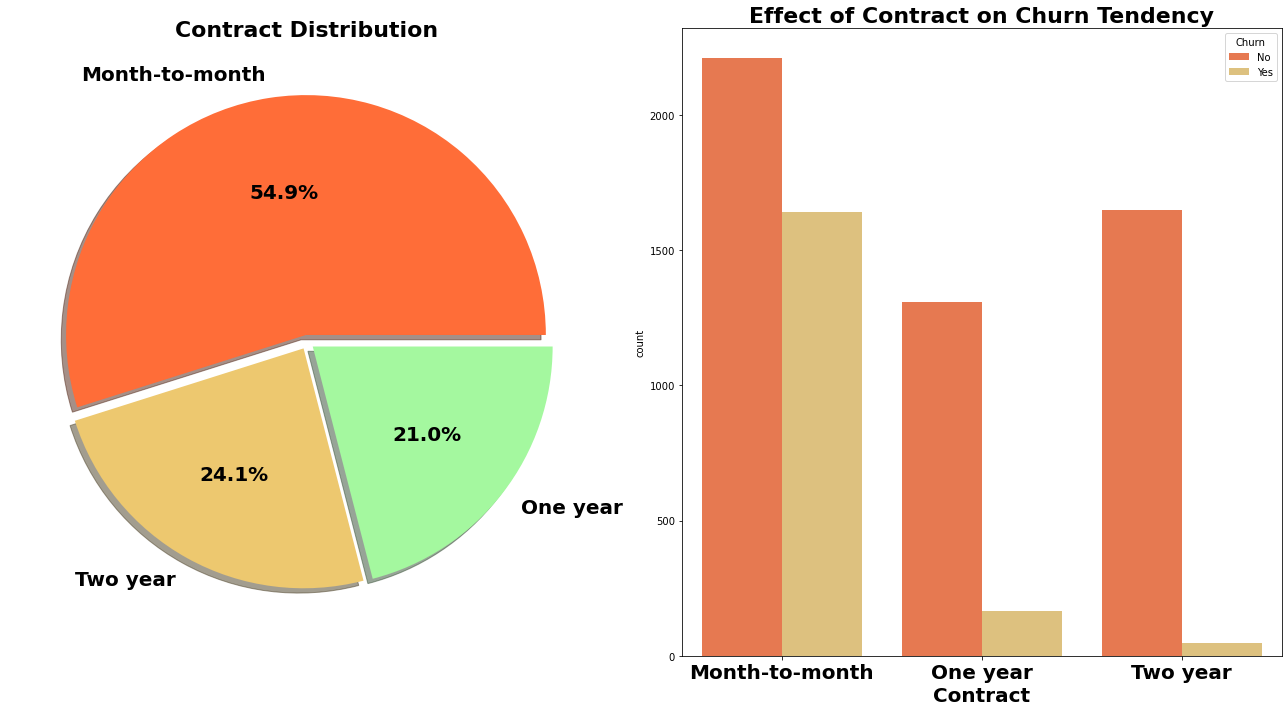

In [51]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['Contract'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',textprops={'fontsize':20,'fontweight':'bold'},ax=ax[0],shadow=True)
ax[0].set_title('Contract Distribution',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Contract',hue='Churn',data=df,ax=ax[1])
ax[1].set_title('Effect of Contract on Churn Tendency',fontsize=22,fontweight='bold')
ax[1].set_xlabel('Contract',fontsize=20,fontweight='bold')
plt.xticks(fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

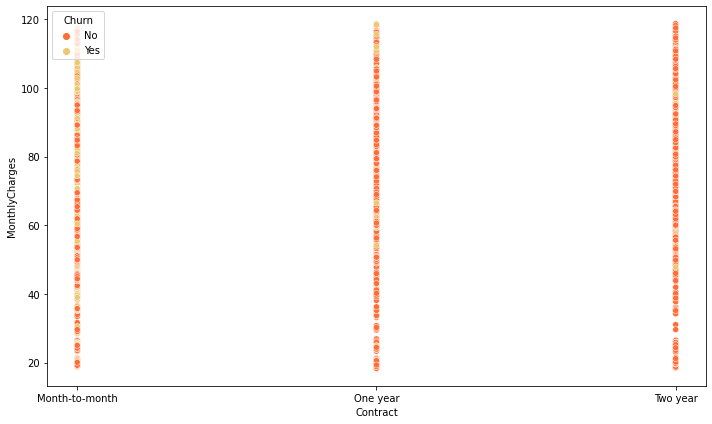

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Contract',y='MonthlyCharges',hue='Churn',data=df)
plt.show()

##### Comment - Almost 55% customer prefer month to month contract as compared to other monthly charges.

### PaperlessBilling VS Churn

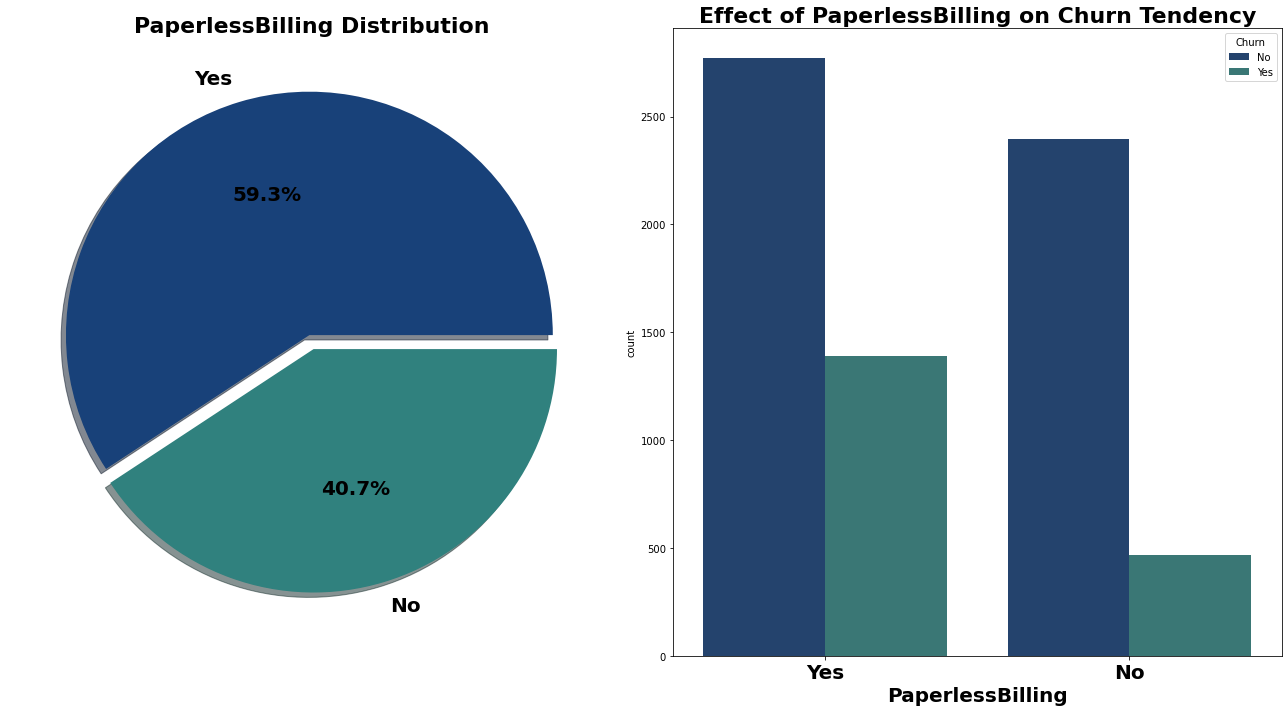

In [55]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('gist_earth')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['PaperlessBilling'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',textprops={'fontsize':20,'fontweight':'bold'},ax=ax[0],shadow=True)
ax[0].set_title('PaperlessBilling Distribution',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('PaperlessBilling',hue='Churn',data=df,ax=ax[1])
ax[1].set_title('Effect of PaperlessBilling on Churn Tendency',fontsize=22,fontweight='bold')
ax[1].set_xlabel('PaperlessBilling',fontsize=20,fontweight='bold')
plt.xticks(fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

##### Comment - We can observe that there is high attrition tendenccy in customer who pays electronic check.

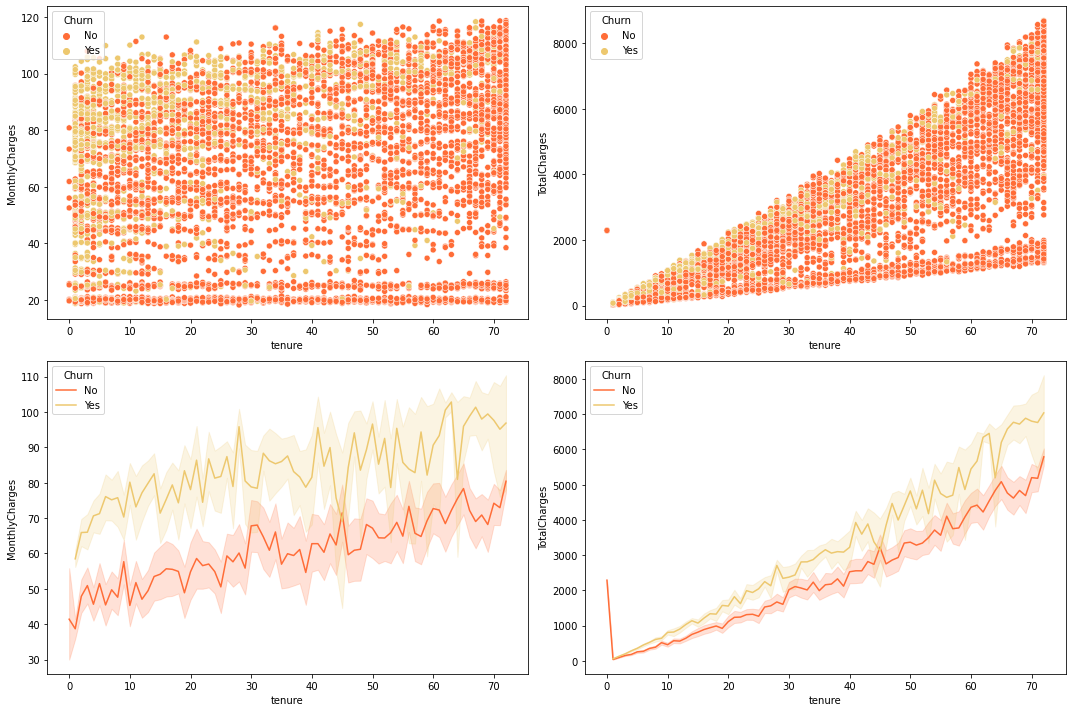

In [64]:
sns.set_palette('rainbow_r')
fig , ax=plt.subplots(2,2, figsize=(15,10))
for i,col in enumerate(["MonthlyCharges","TotalCharges"]):
    sns.scatterplot(ax=ax[0,i],x="tenure", y=col,data=df,hue="Churn")
    sns.lineplot(ax=ax[1,i],x="tenure", y=col,data=df,hue="Churn")

##### Comment - 

- Most customer pays high monthly customer charges which later likely to  churn.
- Same goes with High TotalCharges in customer whose likely to churn later .

## Multivariate Analysis

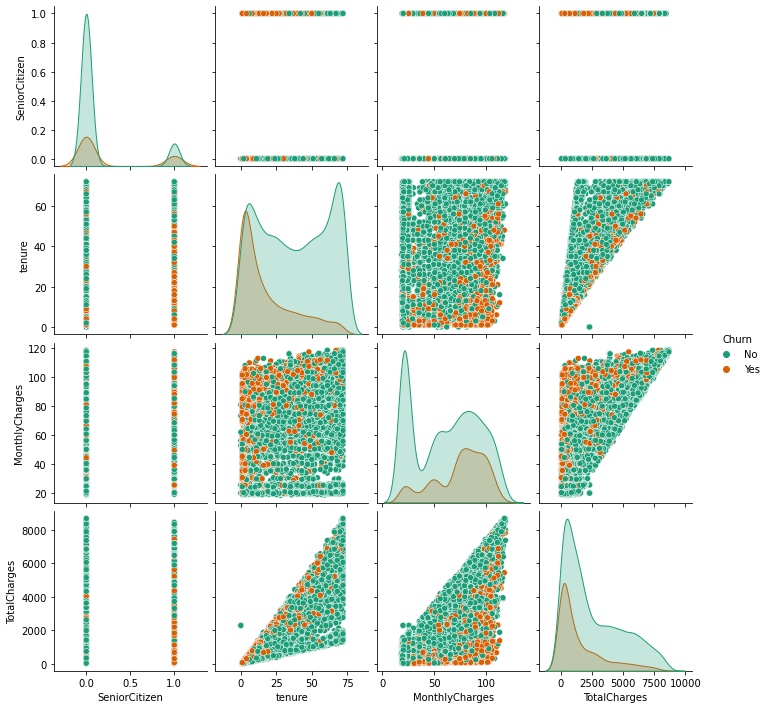

In [66]:
sns.pairplot(df,hue='Churn',palette='Dark2')
plt.show()

## Encoding Categorical Data

In [67]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['tenure'], float64: ['MonthlyCharges', 'TotalCharges'], object: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']}

In [69]:
#using Label Encoder on categorical Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    df[i]=le.fit_transform(df[i])

In [70]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Features Selection and Engineering

### 1. Outliers Detection and Removal

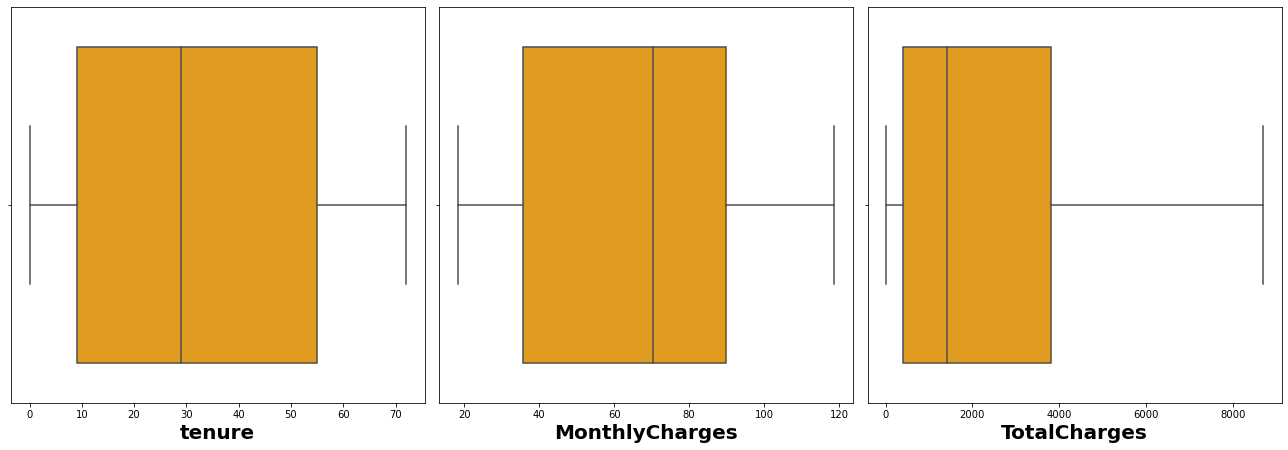

In [71]:
plt.figure(figsize=(18,12),facecolor='white')
plotnumber=1

for col in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[col],color='orange')
        plt.xlabel(col,fontsize=20,fontweight='bold')
    plotnumber+=1
plt.tight_layout()    
plt.show()

##### Comment - From Boxplot we can observe that is no Outliers exist in dataset

### Outliers Removal Using Zscore Method

In [72]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]
print('Shape of the dataframe before removing outliers - ',df.shape)
print('Shape of the dataframe after removing outliers - ',df1.shape)
print('Percentage Data Loss - ',(df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()#copying changes to our original dataframe

Shape of the dataframe before removing outliers -  (7021, 20)
Shape of the dataframe after removing outliers -  (6339, 20)
Percentage Data Loss -  9.713715994872524


In [73]:
df.drop(['PhoneService'],axis=1,inplace=True)

### 2.Skewness Of Features

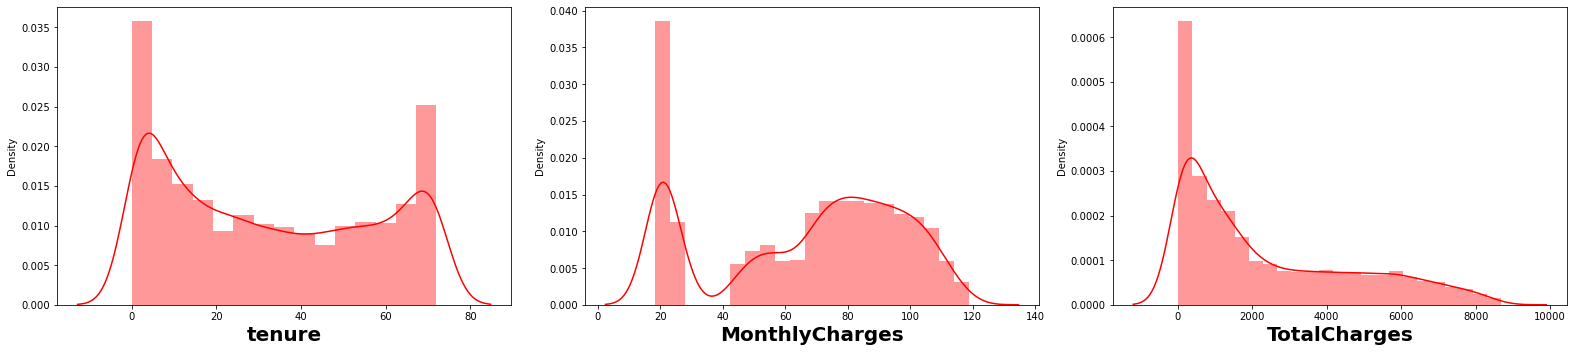

In [74]:
plt.figure(figsize=(22,5),facecolor='white')
plotnumber=1

for col in Numerical:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20,fontweight='bold')
    plotnumber+=1
plt.show()  

##### Comment - Skewness is important feature for continuous data.

**There is no relevance of skewness for discrete numerical feature and categorical feature.Hence we are going to ignore skewness present inn discrete numerical and categorical feature.**

In [75]:
df.skew()

gender             -0.012939
SeniorCitizen       1.819335
Partner             0.049562
Dependents          0.871194
tenure              0.233517
MultipleLines       0.125532
InternetService     0.051965
OnlineSecurity      0.421216
OnlineBackup        0.166121
DeviceProtection    0.181524
TechSupport         0.408970
StreamingTV        -0.005185
StreamingMovies    -0.012505
Contract            0.624212
PaperlessBilling   -0.388673
PaymentMethod      -0.165613
MonthlyCharges     -0.404120
TotalCharges        0.895850
Churn               1.058644
dtype: float64

##### 'tenure','MonthlyCharges','TotalCharges' are continous numerical feature in dataset.

**Out of which TotalCharges is Skewedd in nature.Now we will transform TotalCharges.**

In [76]:
df['TotalCharges'] = np.log1p(df['TotalCharges'])

### 3. Correlation

In [77]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.005846,-0.002207,0.015722,0.001891,-0.006391,0.000983,-0.016826,-0.009353,-0.003121,-0.009769,-0.005624,-0.002760,0.000674,-0.018131,0.021961,-0.011639,-0.006783,-0.011391
SeniorCitizen,-0.005846,1.000000,0.013943,-0.213486,0.017647,0.152954,-0.039479,-0.123668,-0.020710,-0.023590,-0.144694,0.028453,0.047062,-0.141107,0.155193,-0.041891,0.238426,0.111597,0.149599
Partner,-0.002207,0.013943,1.000000,0.453409,0.382932,0.147545,-0.004099,0.151348,0.154738,0.167390,0.132266,0.133353,0.127676,0.297393,-0.010458,-0.147854,0.088571,0.337926,-0.153262
Dependents,0.015722,-0.213486,0.453409,1.000000,0.159194,-0.028535,0.053701,0.146427,0.090389,0.082944,0.130166,0.048859,0.023932,0.242286,-0.106970,-0.037411,-0.131791,0.084275,-0.158628
tenure,0.001891,0.017647,0.382932,0.159194,1.000000,0.358098,-0.034932,0.326356,0.377187,0.367678,0.324457,0.282710,0.292966,0.674586,0.002370,-0.361878,0.242184,0.827354,-0.348882
MultipleLines,-0.006391,0.152954,0.147545,-0.028535,0.358098,1.000000,-0.107675,0.006752,0.125043,0.130055,0.011287,0.187307,0.193380,0.114261,0.174017,-0.183244,0.454819,0.458583,0.042438
InternetService,0.000983,-0.039479,-0.004099,0.053701,-0.034932,-0.107675,1.000000,-0.027406,0.030417,0.049829,-0.022841,0.099513,0.094169,0.115528,-0.164085,0.096674,-0.470605,-0.260767,-0.058968
OnlineSecurity,-0.016826,-0.123668,0.151348,0.146427,0.326356,0.006752,-0.027406,1.000000,0.198167,0.173275,0.283252,0.046717,0.062345,0.367667,-0.154346,-0.089597,-0.071808,0.207795,-0.289182
OnlineBackup,-0.009353,-0.020710,0.154738,0.090389,0.377187,0.125043,0.030417,0.198167,1.000000,0.195604,0.210090,0.151646,0.139587,0.286126,-0.019141,-0.126394,0.110079,0.310079,-0.201206
DeviceProtection,-0.003121,-0.023590,0.167390,0.082944,0.367678,0.130055,0.049829,0.173275,0.195604,1.000000,0.241956,0.278088,0.284397,0.342751,-0.040732,-0.132907,0.154859,0.318027,-0.176171


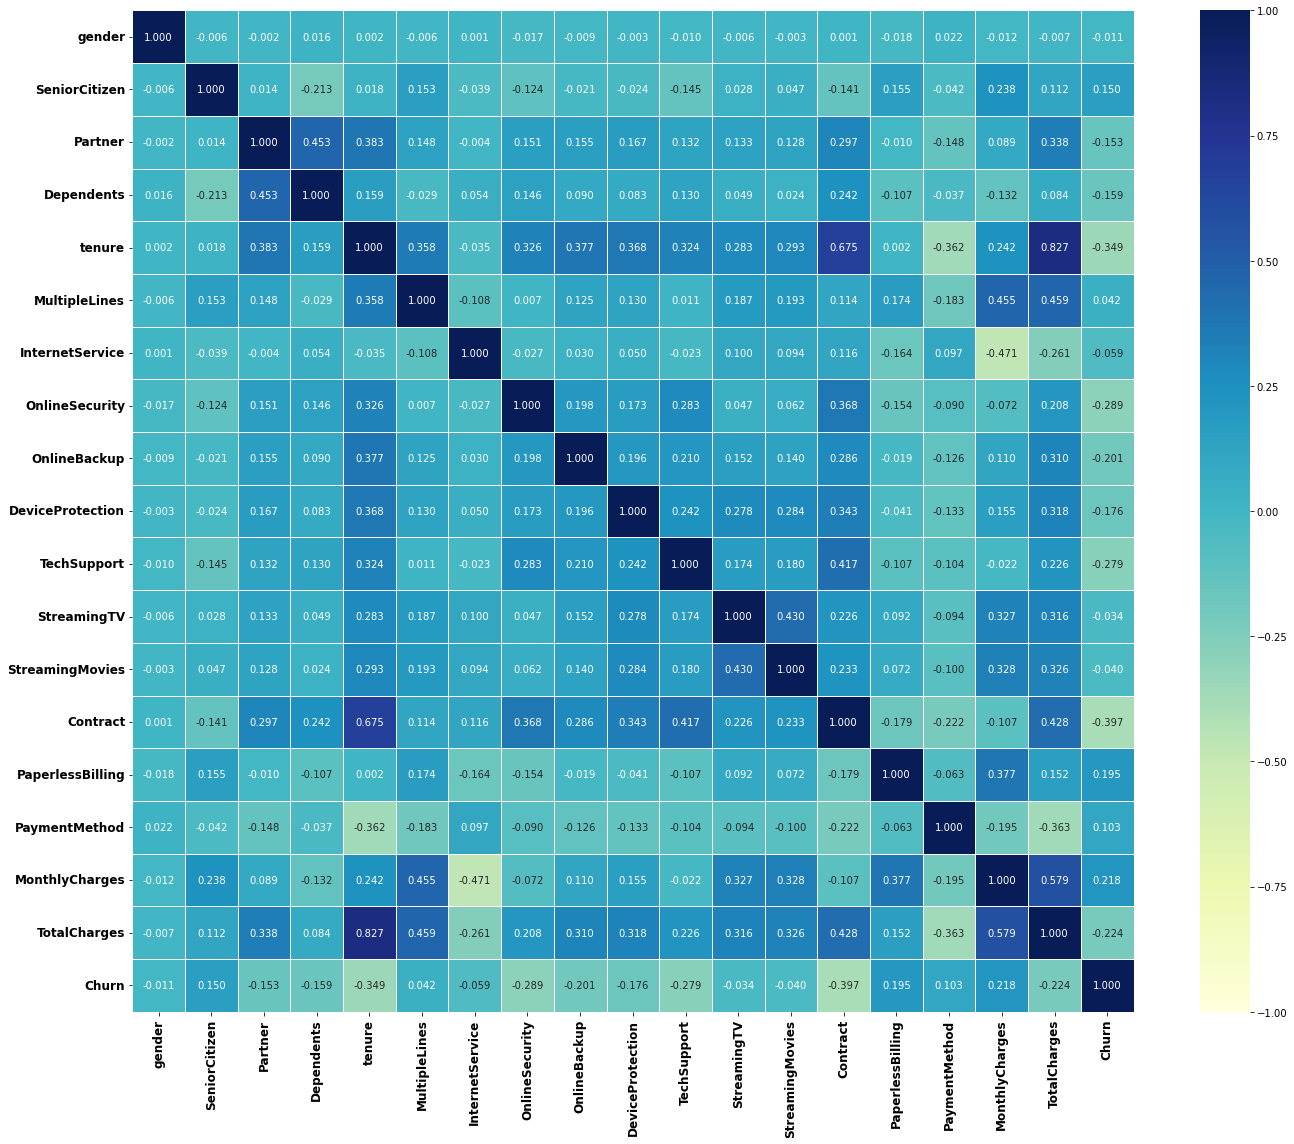

In [78]:
# plotting correlation
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),vmin=-1,vmax=1, annot=True,square=True, fmt='0.3f',linewidths=1,linecolor='white',annot_kws={'size':10},cmap="YlGnBu")
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.show()

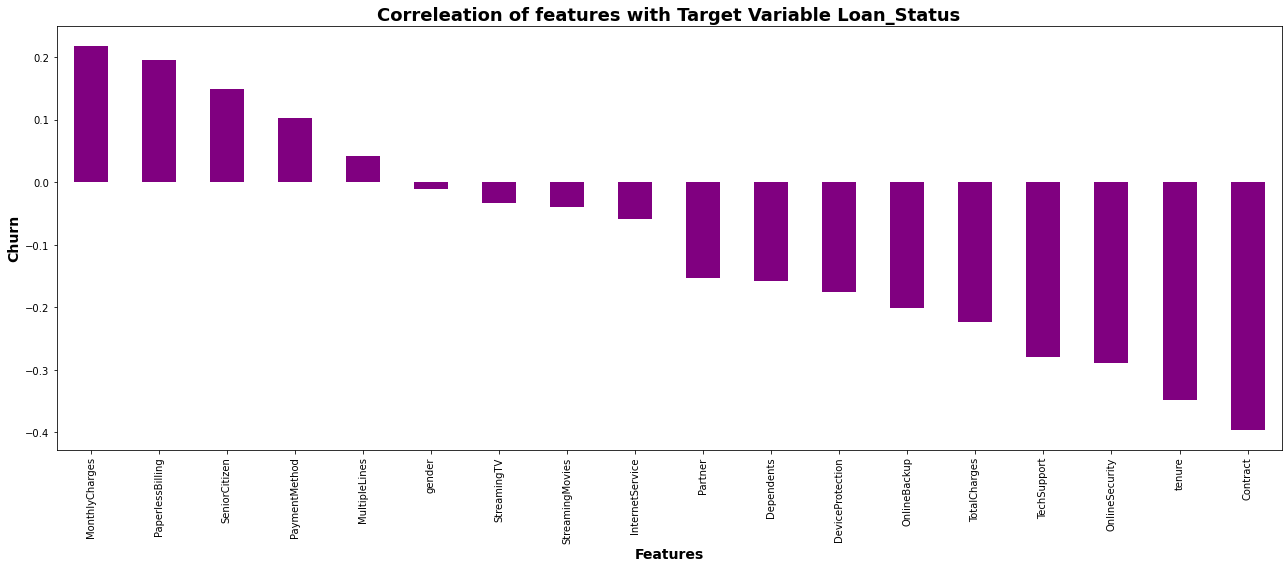

In [79]:
plt.figure(figsize=(18,8))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='purple')
plt.xlabel('Features',fontsize=14,fontweight='bold')
plt.ylabel('Churn',fontsize=14,fontweight='bold')
plt.title('Correleation of features with Target Variable Loan_Status',fontsize=18,fontweight='bold')
plt.show()

### 4. Balancing Imbalanced Target Feature

In [80]:
df.Churn.value_counts()

0    4652
1    1687
Name: Churn, dtype: int64

##### Comment -  As Target variable is imbalanced in nature , we will need to balance target variable. 

## Balancing Using SMOTE

In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
#Splitting data in target and dependent feature 
X=df.drop(['Churn'],axis=1)
Y=df['Churn']

In [83]:
# oversampling using smote techniques 
oversample=SMOTE()
X,Y = oversample.fit_resample(X,Y)

In [84]:
Y.value_counts()

0    4652
1    4652
Name: Churn, dtype: int64

##### Comment - Now our dataset is balanced,we have all the categories have same data ensuring that the ML model does not get biased towards one category.

## Standard Scaling

In [85]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

### 5. Checking Multicollinearity between features using variance_inflation_factor

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_scale,i)for i in range(len(X.columns))]
vif['Features']=X.columns
vif

,VIF,Features
0,1.012844,gender
1,1.090398,SeniorCitizen
2,1.552654,Partner
3,1.436110,Dependents
4,6.525064,tenure
5,1.422159,MultipleLines
6,1.464892,InternetService
7,1.339889,OnlineSecurity
8,1.237547,OnlineBackup
9,1.315652,DeviceProtection


##### Comment - Independent features VIF is within permissible limit of 10.

## PCA

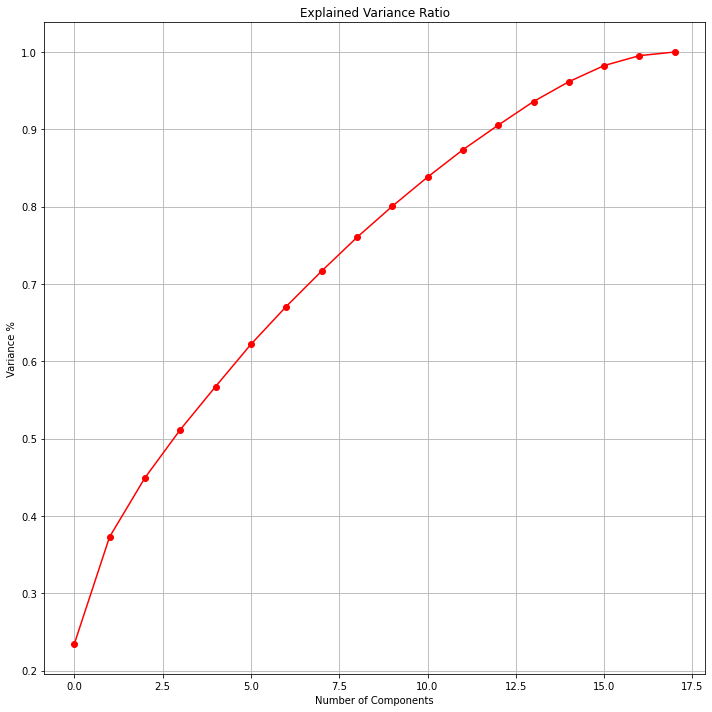

In [88]:
from sklearn.decomposition import PCA
pca = PCA()
#plot graph to find principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance Ratio')
plt.grid()

##### Comment - According to the graph , we can observe that 13 principal components attribute for 90% of variation in the data.We shall choose the first 13 components for our prediction.

In [89]:
pca_new = PCA(n_components=13)
x_new = pca_new.fit_transform(X_scale)

In [90]:
principle_x=pd.DataFrame(x_new,columns=np.arange(13))

## Machine Learning & Model Building

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (6512, 13)
Training target vector size: (6512,)
Test feature matrix size: (2792, 13)
Test target vector size: (2792,)


## Finding Best Random State

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, test_size=0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8083810888252149 on Random_state 135


In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=135, test_size=0.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
log_reg.score(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8083810888252149


Confusion matrix of Logistics Regression : 
 [[1063  318]
 [ 217 1194]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      1381
           1       0.79      0.85      0.82      1411

    accuracy                           0.81      2792
   macro avg       0.81      0.81      0.81      2792
weighted avg       0.81      0.81      0.81      2792



## Finding best n_neighbors for KNN Regressor

In [107]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.472374359821338
RMSE value for k=  2 is: 0.42455521981302635
RMSE value for k=  3 is: 0.40805328291012205
RMSE value for k=  4 is: 0.3970081971395409
RMSE value for k=  5 is: 0.38877516870957385
RMSE value for k=  6 is: 0.38641364444900783
RMSE value for k=  7 is: 0.3820041083075089
RMSE value for k=  8 is: 0.37945804032808095
RMSE value for k=  9 is: 0.3784004270058768
RMSE value for k=  10 is: 0.3783257491803019
RMSE value for k=  11 is: 0.3783999924202664
RMSE value for k=  12 is: 0.37712308900382896
RMSE value for k=  13 is: 0.3763634273907194
RMSE value for k=  14 is: 0.37599156472615125
RMSE value for k=  15 is: 0.3755437530759515
RMSE value for k=  16 is: 0.3755070592890781
RMSE value for k=  17 is: 0.37601549477857965
RMSE value for k=  18 is: 0.3749963151445593
RMSE value for k=  19 is: 0.37566266684429844
RMSE value for k=  20 is: 0.37584670410377863
RMSE value for k=  21 is: 0.3762404304724151
RMSE value for k=  22 is: 0.3771659292029269
RMSE value

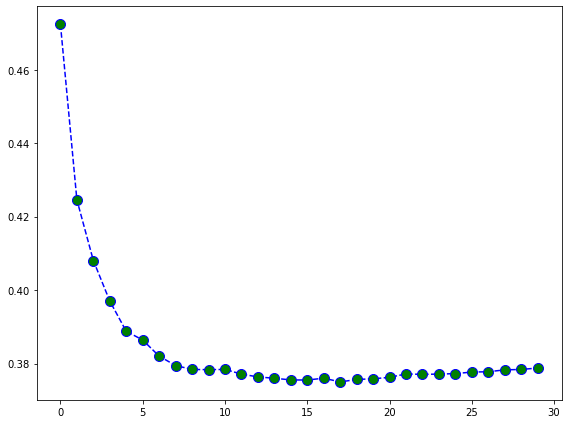

In [108]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(30), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

##### Comment - At k=18 we get the minimum rmse value which is approximately  0.3749963151445593,which further increases the k value.We can say that k=18 will give us the best result.

### Applying Other Classification Algorithm

In [110]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.8083810888252149


Confusion matrix : 
 [[1063  318]
 [ 217 1194]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      1381
           1       0.79      0.85      0.82      1411

    accuracy                           0.81      2792
   macro avg       0.81      0.81      0.81      2792
weighted avg       0.81      0.81      0.81      2792



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8126790830945558


Confusion matrix : 
 [[1074  307]
 [ 216 1195]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.78      0.80      1381
           1       0.80      0.85      0.82      1411

    accuracy                           0.81      2792
   macro avg       0.81      0.81      0.81      2792
weighted avg       0.81      0.81      0

### Crossvalidation

In [111]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.75013434 0.74691026 0.79473401 0.80225685 0.80752688]
Mean Score : 0.7803124693048599
Std deviation : 0.026292919812948738




Cross Validation Score SVC() :

Score : [0.74099946 0.74691026 0.81569049 0.83073616 0.82419355]
Mean Score : 0.7917059853356676
Std deviation : 0.03932393957767053




Cross Validation Score GaussianNB() :

Score : [0.71359484 0.71789361 0.80225685 0.80386889 0.81021505]
Mean Score : 0.7695658479369976
Std deviation : 0.04404663972464133




Cross Validation Score DecisionTreeClassifier() :

Score : [0.68941429 0.7001612  0.77753896 0.78022569 0.78225806]
Mean Score : 0.7459196408451925
Std deviation : 0.04191385394441913




Cross Validation Score KNeighborsClassifier(n_neighbors=18) :

Score : [0.75497045 0.75980656 0.8027942  0.80924234 0.81182796]
Mean Score : 0.7877282996192358
Std deviation : 0.024993317333019557




Cross Validation Score RandomForestClassifier() :

Score : [0.72434175 0.744760

## Hyper Parameter Tuning : GridSearchCV

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
parameter={'bootstrap':[True],'max_depth':[5,10,20,40,50,60],
          'max_features':['auto','log2'],
           'criterion':['gini','entropy'],
          'n_estimators':[5,10,15,25,50,60,70]
          }

In [114]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose = 10)

In [115]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.744 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.761 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.760 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.753 total time=   0.0s
[CV 5

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [116]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 60}

## Final Model

In [118]:
Final_mod = ExtraTreesClassifier(bootstrap=True,criterion='gini',n_estimators= 60,max_depth= 20,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test,y_pred))

Accuracy Score :
 0.8166189111747851


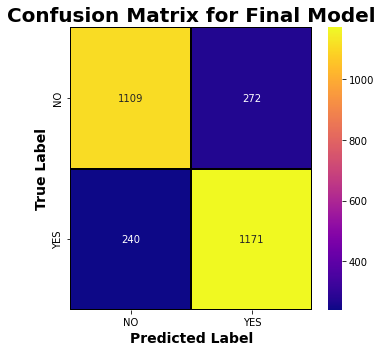

In [119]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

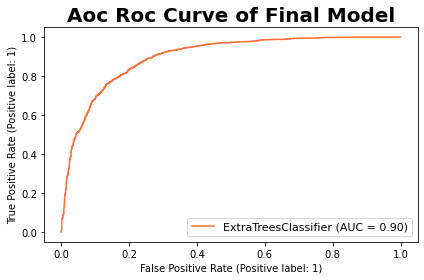

<Figure size 864x864 with 0 Axes>

Auc Score :
 0.8164745705999874


In [123]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)
plt.legend(prop={'size':11},loc='lower right')
plt.title('Aoc Roc Curve of Final Model',fontsize=20,fontweight='bold')
plt.figure(figsize=(12,12))
plt.show()
auc_score=roc_auc_score(Y_test,Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## Saving Model

In [124]:
import joblib
joblib.dump(Final_mod,'Customer_Churn_Final.pkl')

['Customer_Churn_Final.pkl']